### **Project Information**


**Project Tile-**  Comprehensive Trade Dashboard: Detailed Imports and Exports Transactions


**Name-**  Pratyaksh Chauhan


**Roll-Number-** 055031


---

### **Description Of Project**

*  **Data Source & Size-**  Kaggle/1MB/  https://www.kaggle.com/datasets/chakilamvishwas/imports-exports-15000
*  **Data Type-** Panel
*  **Data Dimensions-** 15000, 16
*  **Data Variable Type-** Object, Int, Float
*  **Data Variable Category-**

    * **Index-** Transaction_ID, Customs_Code, Invoice_Number, Product, Supplier, Customer
  
    * **Non-Categorical-** Quantity, Value, Date, Port, Weight
  
    * **Categorical-Ordinal-**  NONE
  
  
    * **Categorical-Nominal-** Import_Export, Category, Shipping_Method, Payment_Terms, Country

### **About Dataset**

*  **Description:**
  This dataset provides detailed information on international trade transactions, capturing both import and export activities. It includes comprehensive data on various aspects of trade, making it a valuable resource for business analysis, economic research, and financial modeling.



*  **Features:**
   * **Transaction_ID:** Unique identifier for each trade transaction.
   * **Country:** Country of origin or destination for the trade.
   * **Product:** Product being traded.
   * **Import_Export:** Indicates whether the transaction is an import or export.
   * **Quantity:** Amount of the product traded.
   * **Value:** Monetary value of the product in USD.
   * **Date:** Date of the transaction.
   * **Category:** Category of the product (e.g., Electronics, Clothing, Machinery).
   * **Port:** Port of entry or departure.
   * **Customs_Code:** Customs or HS code for product classification.
   * **Weight** Weight of the product in kilograms.
   * **Shipping_Method:** Method used for shipping (e.g., Air, Sea, Land).
   * **Supplier:** Name of the supplier or manufacturer.
   * **Customer:** Name of the customer or recipient.
   * **Invoice_Number:** Unique invoice number for the transaction.
   * **Payment_Terms:** Terms of payment (e.g., Net 30, Net 60, Cash on Delivery).
     
 * **Usage:** This dataset can be used for various analyses, including:
   * **Trade Analysis:** Understanding trade patterns and trends.
   * **Economic Research:** Studying the impact of trade on different economies.
   * **Financial Modeling:** Evaluating financial performance and risks associated with trade.
   * **Supply Chain Management:** Analyzing logistics and shipping methods.
   * **Data Format:** The dataset is provided in CSV format, making it easy to load into data analysis tools and frameworks.

* **Additional Notes:**
The dataset consists of 15,000 rows, ensuring a substantial sample size for meaningful analysis.
Data is generated with realistic variability, simulating actual trade transactions.

  ___

In [126]:
# Import Relevant Python Libraries.
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

In [4]:
#Load the Data.
import_export= pd.read_csv('/Users/pratyakshchauhan/Downloads/Imports_Exports_Dataset.csv')

In [7]:
#Data Dimensions
import_export.shape

(15000, 16)

In [32]:
#Data Variable Type
import_export.dtypes

Transaction_ID      object
Country             object
Product             object
Import_Export       object
Quantity             int64
Value              float64
Date                object
Category            object
Port                object
Customs_Code         int64
Weight             float64
Shipping_Method     object
Supplier            object
Customer            object
Invoice_Number       int64
Payment_Terms       object
dtype: object

In [34]:
#Identify & List the following Variables:
# 1. Index Variables- Transaction_ID, Customs_Code, Invoice_Number, Product, Supplier, Customer
# 2. Non-Categorical Variables- Quantity, Value, Date, Port, Weight
# 3. Ordinal Variables-
# 4. Nominal Variables- Import_Export, Category, Shipping_Method, Payment_Terms, Country

---

### **Objectives**


* **Analyze Import vs Export Value:** Compare the total values of imports and exports to understand their contribution to overall transactions.
* **Identify Top Countries by Transaction Value:** Highlight the countries with the highest transaction values to determine major trading partners.
* **Examine Product Category Distribution:** Assess the distribution of product categories within the dataset to identify the most common types of products.
* **Evaluate Shipping Methods:** Analyze the number of transactions by different shipping methods to understand preferences in logistics.
* **Evaluate Payment Methods:** The distribution of payment terms across import and export transactions to compare how often each term is used in both contexts.
* **Analyze average transaction value each month:** depicting the average transaction value for each month, enabling the identification of seasonal trends, fluctuations, and patterns in transaction values over the year, which can provide insights into market behavior and economic activity.

### **Problem Statement**


This project aims to analyze and visualize trade data for imports and exports to uncover insights into trading patterns and market dynamics. We will compare the total values of imports and exports to understand their economic impact, identify top trading partners by transaction value, and assess the distribution of product categories. Additionally, we will analyze shipping methods and payment terms to optimize logistics and cash flow management. By examining average transaction values monthly, we can identify seasonal trends and fluctuations. To communicate these findings effectively, a comprehensive dashboard with visualizations such as bar charts, line graphs, and choropleth maps will be created, enabling stakeholders to interact with the data for informed decision-making.




---


### **Analysis Of Data**

In [9]:
#Create a unique sample
my_data = import_export.sample(n= 3001, replace= False, random_state=55031)
my_data.head(3)

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
14815,c9b92da7-8db8-4167-b4c9-2b94a4416c44,Bolivia,ready,Export,284,5364.51,11-01-2022,Clothing,Washingtonchester,923677,135.74,Sea,"Price, Burgess and Guerra",Sally Walker,44802928,Prepaid
12842,50d1babc-2a52-40e5-82c9-24cb856d2b0d,Denmark,visit,Export,3932,9599.03,05-03-2020,Machinery,New Jacobbury,767841,1083.80,Land,Rodriguez LLC,Karen Padilla,55245802,Cash on Delivery
1953,e5007181-5481-4307-993c-47c3f953249a,Moldova,federal,Export,4923,3772.58,27-02-2020,Furniture,New James,213710,2828.18,Land,Price PLC,Robert Hartman,27808101,Net 30


In [11]:
#Dimension
my_data.shape

(3001, 16)

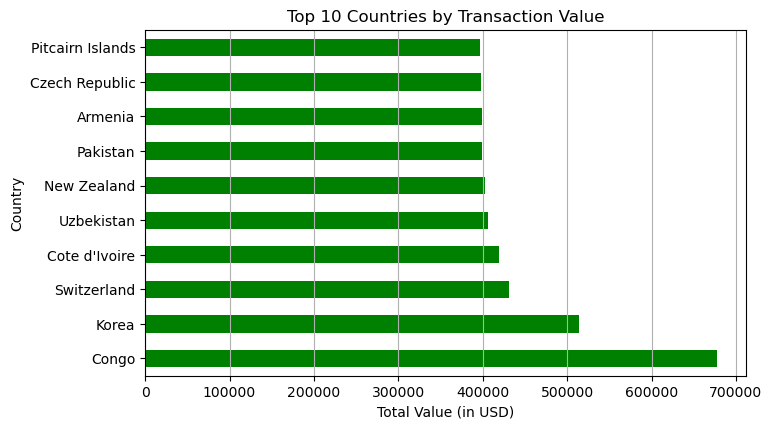

In [103]:
# Set up the plotting area
plt.figure(figsize=(14, 8))

# Graph: Top Countries by Transaction Value (Horizontal Bar Chart)
plt.subplot(2, 2, 2)
top_countries = import_export.groupby('Country')['Value'].sum().nlargest(10)
top_countries.plot(kind='barh', color='green')  # Change to horizontal bar chart
plt.title('Top 10 Countries by Transaction Value')
plt.xlabel('Total Value (in USD)')  # Update x-label for horizontal chart
plt.ylabel('Country')
plt.grid(axis='x')  # Optional: Add gridlines for better readability

# Adjust layout
plt.tight_layout()
plt.show()


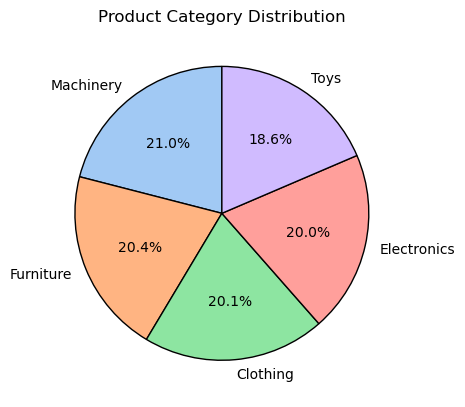

In [44]:
# Set up the plotting area
plt.figure(figsize=(14, 8))

# Graph : Product Category Distribution
plt.subplot(2, 2, 3)
category_distribution = my_data['Category'].value_counts()
category_distribution.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Product Category Distribution')
plt.ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

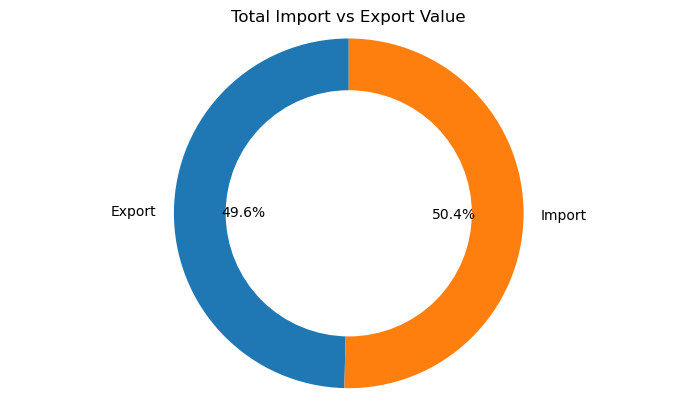

In [109]:

# Convert 'Date' column to datetime format
my_data['Date'] = pd.to_datetime(my_data['Date'], format='%d-%m-%Y')

# Set up the plotting area
plt.figure(figsize=(14, 8))

# Graph: Donut Chart for Total Import vs Export Value
plt.subplot(2, 2, 1)
import_export_value = my_data.groupby('Import_Export')['Value'].sum()

# Create a pie chart
plt.pie(import_export_value, labels=import_export_value.index, autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e'])

# Draw a white circle at the center of the pie chart to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, color='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  
plt.title('Total Import vs Export Value')
plt.tight_layout()
plt.show()



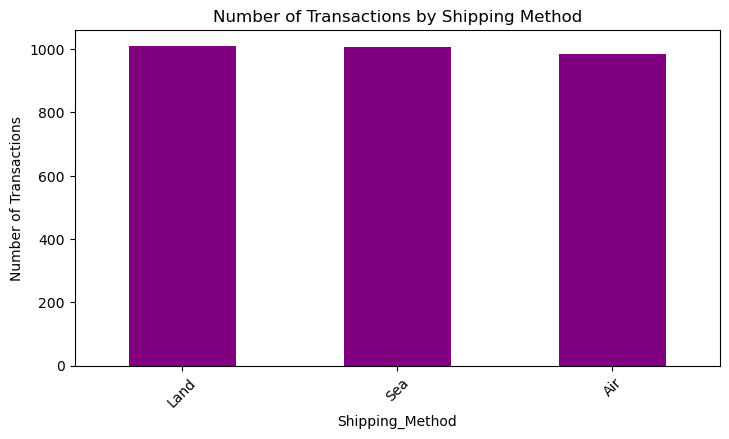

In [48]:
# Set up the plotting area
plt.figure(figsize=(14, 8))

# Graph 4: Shipping Methods Analysis
plt.subplot(2, 2, 4)
shipping_method_count = my_data['Shipping_Method'].value_counts()
shipping_method_count.plot(kind='bar', color='purple')
plt.title('Number of Transactions by Shipping Method')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

<Figure size 2000x1400 with 0 Axes>

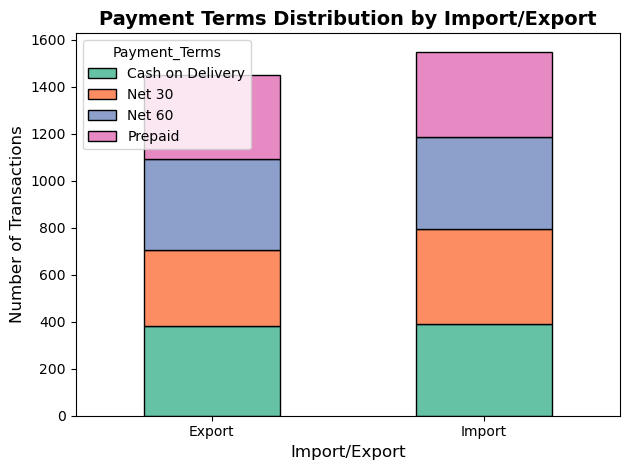

<Figure size 640x480 with 0 Axes>

In [60]:

# Stacked Bar Chart for Payment Terms by Import/Export
plt.figure(figsize=(20, 14))

# Group by Import_Export and Payment_Terms to get counts
stacked_data = my_data.groupby(['Import_Export', 'Payment_Terms']).size().unstack()

# Plot a stacked bar chart
stacked_data.plot(kind='bar', stacked=True, color=sns.color_palette('Set2'), edgecolor='black')

# Add labels and title
plt.title('Payment Terms Distribution by Import/Export', fontsize=14, fontweight='bold')
plt.ylabel('Number of Transactions', fontsize=12)
plt.xlabel('Import/Export', fontsize=12)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Adjust layout
plt.tight_layout()
plt.show()

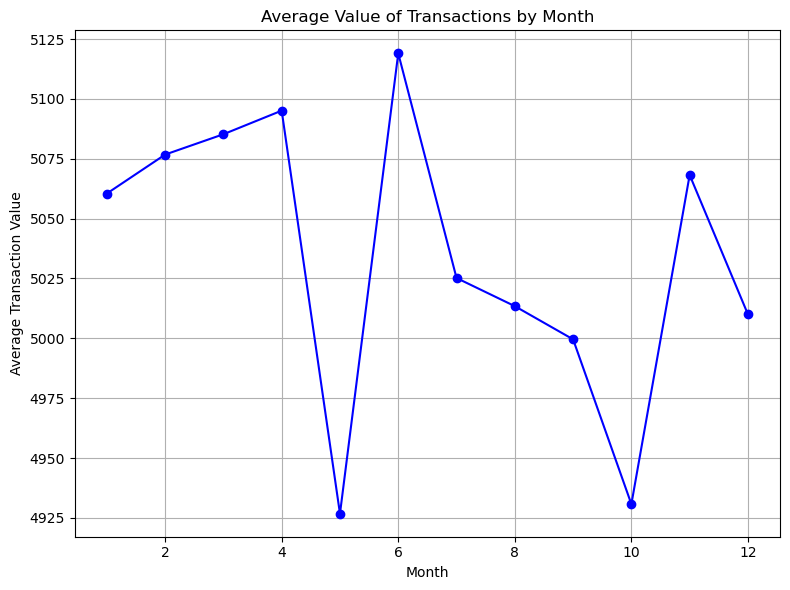

In [111]:
my_data['Date'] = pd.to_datetime(my_data['Date'], format='%d-%m-%Y')

# Extract month from the date
my_data['Month'] = my_data['Date'].dt.month

# Group by month and calculate the average transaction value
monthly_avg_value = my_data.groupby('Month')['Value'].mean()

# Plot the line graph
plt.figure(figsize=(8, 6))
plt.plot(monthly_avg_value.index, monthly_avg_value.values, marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('Average Value of Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Average Transaction Value')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

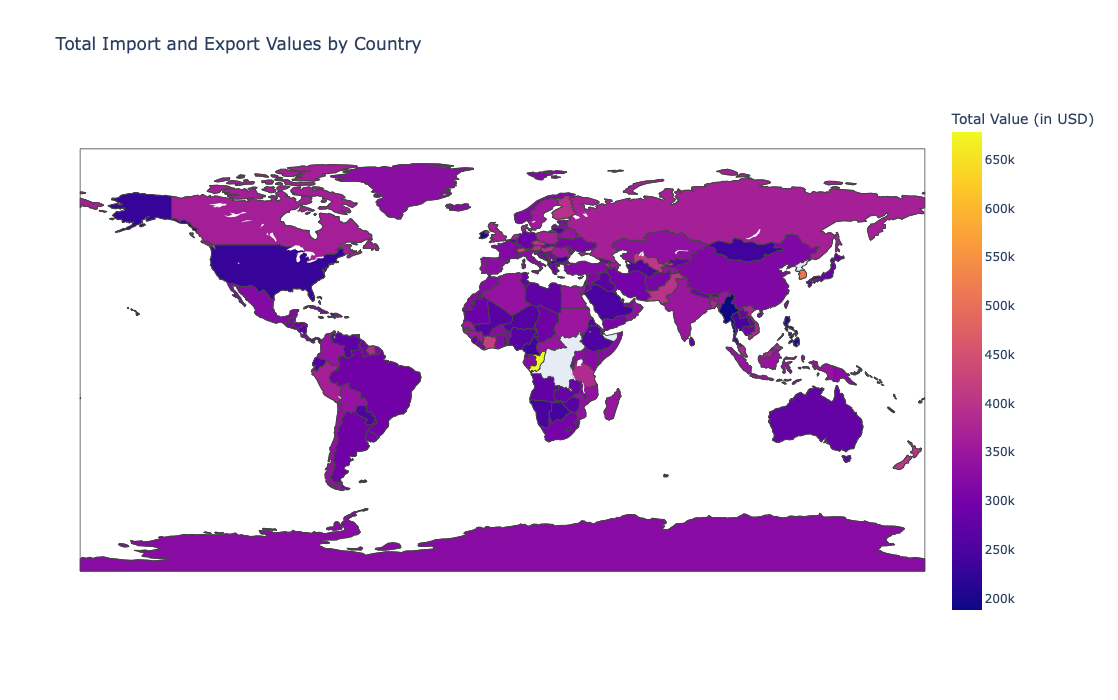

In [128]:


# Group the data by country and import/export status
country_values = my_data.groupby(['Country', 'Import_Export'])['Value'].sum().reset_index()

# Pivot the data for plotting
country_values_pivot = country_values.pivot(index='Country', columns='Import_Export', values='Value').fillna(0)

# Create a new column for total value
country_values_pivot['Total'] = country_values_pivot.sum(axis=1)

# Create a map chart
fig = px.choropleth(country_values_pivot,
                    locations=country_values_pivot.index,
                    locationmode='country names',  # Use country names
                    color='Total',  # Color based on total value
                    hover_name=country_values_pivot.index,
                    title='Total Import and Export Values by Country',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    labels={'Total': 'Total Value (in USD)'})

# Update layout for larger size
fig.update_layout(width=1100, height=700)  # Adjust the width and height as desired

# Show the figure
fig.show()


---

### **Findings & Observation**

* **1st-Graph**- The bar chart reveals a significant disparity in transaction values among the top 10 countries. Congo and Korea exhibit substantially higher transaction volumes compared to the remaining countries, suggesting potential factors such as economic activity, industry composition, or government policies.
* **2nd-Graph**-
  * Machinery and Clothing are the two leading product categories, each accounting for approximately 20% of the total distribution.
  * Toys, Electronics, and Furniture have relatively similar proportions, ranging from 18.6% to 20.4%.
  * There is no single dominant category, suggesting a diversified product mix.
* **3rd-Graph**- Imports slightly outweigh exports in terms of total value.Overall, the chart suggests a relatively balanced trade scenario, with imports and exports being fairly close in terms of value.
* **4th-Graph**- the chart indicates that Land, Sea, and Air are all popular shipping methods, with Land and Sea being slightly more used than Air.
* **5th-Graph**-
  * Net 30 is the most commonly used payment term for both imports and exports.
  * Cash on Delivery and Net 60 are also used to a significant extent, especially for exports.
  * Prepaid is the least used payment term, particularly for imports.
  * The distribution of payment terms differs between imports and exports. For imports, Net 30 and Net 60 are more prevalent, while for exports, Cash on Delivery is used more frequently.
  * the chart indicates a variety of payment terms used in both imports and exports, with Net 30 being the most popular choice.
* **6th-Graph**- the chart suggests a cyclical pattern in average transaction values, with some months experiencing higher values than others.The fluctuations are relatively small, indicating a relatively stable average transaction value throughout the year.
* **7th-Graph**-
  * There is a significant variation in total import and export values across countries.
  * Countries in North America, Europe, and Asia generally have higher values compared to countries in Africa, South America, and Oceania.
  * China, the United States, and India appear to have the highest total values, represented by the darkest color on the map.
  * Countries in Africa tend to have lower total values, indicated by lighter colors.

---

 


### Managerial Insights:

* **Uneven distribution of transaction values:** There is a significant disparity in transaction values among the top 10 countries, with Congo and Korea showing substantially higher volumes compared to others. This suggests potential factors like economic activity, industry composition, or government policies.
* **Diversified product mix:** The balanced distribution of product categories indicates a diversified product mix, suggesting a wide range of offerings to cater to different customer needs.
* **Trade Balance:** While the current trade scenario appears relatively balanced, it's essential to monitor trends over time. A slight imbalance could indicate potential areas for improvement or adjustment in trade policies.
* **Shipping Method Preferences:** The popularity of Land and Sea suggests that these modes of transportation are well-suited for the majority of products being traded. However, it's worth considering factors such as cost, speed, and reliability when selecting shipping methods.
* **Payment Term Flexibility:** The use of various payment terms indicates flexibility in accommodating different customer preferences and financial situations. However, it's crucial to manage credit risk and ensure timely payments.
* **Seasonal Fluctuations:** The cyclical pattern in transaction values highlights the importance of seasonal forecasting and planning. Businesses can optimize inventory levels, staffing, and marketing efforts to align with demand fluctuations.
* **Global Trade Disparities:** The significant variations in import and export values across countries underscore the importance of understanding regional market dynamics and tailoring strategies accordingly.
### Recommendations:

* **Focus on high-value transactions:** Identify the factors contributing to the higher transaction values in Congo and Korea and implement strategies to increase average transaction values in other countries.
* **Maintain product diversification:** Continue to offer a balanced product mix to cater to diverse customer preferences and mitigate risks associated with relying heavily on a single product category.
* **Optimize trade strategies:** Analyze the reasons for the slight imbalance between imports and exports and implement strategies to achieve a more balanced trade position.
* **Evaluate shipping method efficiency:** Assess the costs and benefits of different shipping methods to identify the most efficient options for various products and destinations.
* **Negotiate favorable payment terms:** Negotiate favorable payment terms that balance the need for cash flow with customer satisfaction.
* **Monitor seasonal trends:** Track the cyclical patterns in average transaction values to anticipate fluctuations and adjust business strategies accordingly.
* **Target high-potential markets:** Identify countries with high growth potential and favorable economic conditions, and develop strategies to penetrate these markets.
---

### **Conclusion**

The analysis of trade data has revealed significant insights into transaction values, product categories, shipping methods, payment terms, and global trade disparities. Key findings show notable disparities in transaction volumes among top countries, particularly with Congo and Korea, and highlight a diversified product mix that supports a balanced trade scenario. The preferred shipping methods (Land and Sea) and a variety of payment terms indicate adaptability to customer needs.

To facilitate data-driven decision-making, a comprehensive dashboard has been developed, integrating visualizations that enable stakeholders to interact with key metrics and market trends. This tool will empower management to monitor performance, identify growth opportunities, and implement informed strategies. By leveraging these insights and the dashboard, the organization can enhance competitiveness and optimize trade operations for sustained growth in a dynamic market.



---